# ML Pipeline Preparation
Follow the instructions below to help you create your ML pipeline.
### 1. Import libraries and load data from database.
- Import Python libraries
- Load dataset from database with [`read_sql_table`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_sql_table.html)
- Define feature and target variables X and Y

In [1]:
# import libraries
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
import sqlite3
import re
import time
import joblib
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer
from sklearn.multioutput import MultiOutputClassifier
from sklearn.base import BaseEstimator,TransformerMixin
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import * 
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier


pd.set_option('expand_frame_repr', False)  # 当列太多时不换行
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 5000)  # 最多显示数据的行数


path = r'D:\金融股票\Udacity\Data Science\3. Data Engineering\5. Project - Disaster Response Pipeline\data'

In [2]:
# load data from database
engine = create_engine('sqlite:///' + path + '\ETL_Cleaned.db')
df = pd.read_sql_table('message',engine)

print(df.shape)
df.head(2)

(26216, 40)


,id,message,original,genre,related,request,offer,aid_related,medical_help,medical_products,search_and_rescue,security,military,child_alone,water,food,shelter,clothing,money,missing_people,refugees,death,other_aid,infrastructure_related,transport,buildings,electricity,tools,hospitals,shops,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
0,2,Weather update - a cold front from Cuba that c...,Un front froid se retrouve sur Cuba ce matin. ...,direct,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,7,Is the Hurricane over or is it not over,Cyclone nan fini osinon li pa fini,direct,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0


In [3]:
for col in df.iloc[:,4:].columns:
    print(col,df[col].unique())

related [1 0]
request [0 1]
offer [0 1]
aid_related [0 1]
medical_help [0 1]
medical_products [0 1]
search_and_rescue [0 1]
security [0 1]
military [0 1]
child_alone [0]
water [0 1]
food [0 1]
shelter [0 1]
clothing [0 1]
money [0 1]
missing_people [0 1]
refugees [0 1]
death [0 1]
other_aid [0 1]
infrastructure_related [0 1]
transport [0 1]
buildings [0 1]
electricity [0 1]
tools [0 1]
hospitals [0 1]
shops [0 1]
aid_centers [0 1]
other_infrastructure [0 1]
weather_related [0 1]
floods [0 1]
storm [0 1]
fire [0 1]
earthquake [0 1]
cold [0 1]
other_weather [0 1]
direct_report [0 1]


In [4]:
# replace all the 2 in related column with 1
df['related']=df['related'].map(lambda x: 1 if x == 2 else x)

In [5]:
for col in df.iloc[:,4:].columns:
    print(col,df[col].unique())

related [1 0]
request [0 1]
offer [0 1]
aid_related [0 1]
medical_help [0 1]
medical_products [0 1]
search_and_rescue [0 1]
security [0 1]
military [0 1]
child_alone [0]
water [0 1]
food [0 1]
shelter [0 1]
clothing [0 1]
money [0 1]
missing_people [0 1]
refugees [0 1]
death [0 1]
other_aid [0 1]
infrastructure_related [0 1]
transport [0 1]
buildings [0 1]
electricity [0 1]
tools [0 1]
hospitals [0 1]
shops [0 1]
aid_centers [0 1]
other_infrastructure [0 1]
weather_related [0 1]
floods [0 1]
storm [0 1]
fire [0 1]
earthquake [0 1]
cold [0 1]
other_weather [0 1]
direct_report [0 1]


In [6]:
feature = df['message']
label =  df.iloc[:,4:] 

### 2. Write a tokenization function to process your text data

In [7]:
url_regex = 'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'

# detect if message contain urls
txt = feature.values
n = 0


for text in txt:
    if re.findall(url_regex,text) != []:
        print('there is url')
        print('the url is on number: {} row'.format(n))
        print('the first url is:',re.findall(url_regex,text))
        break
    else:
        print('no url find yet')
    n += 1

no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url f

no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url f

no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url f

no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url f

no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url f

no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url find yet
no url f

In [8]:
# define a function to tokenize and clean the feature
def tokenize(text):
    detected_urls = re.findall(url_regex, text)
    for url in detected_urls:
        text = text.replace(url, "urlplaceholder")

    tokens = word_tokenize(text)
    lemmatizer = WordNetLemmatizer()

    clean_tokens = []
    for tok in tokens:
        clean_tok = lemmatizer.lemmatize(tok).lower().strip()
        clean_tokens.append(clean_tok)

    return clean_tokens

### 3. Build a machine learning pipeline
This machine pipeline should take in the `message` column as input and output classification results on the other 36 categories in the dataset. You may find the [MultiOutputClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.multioutput.MultiOutputClassifier.html) helpful for predicting multiple target variables.

As a reference, base on https://www.datarobot.com/ the following model are most popular for NLP
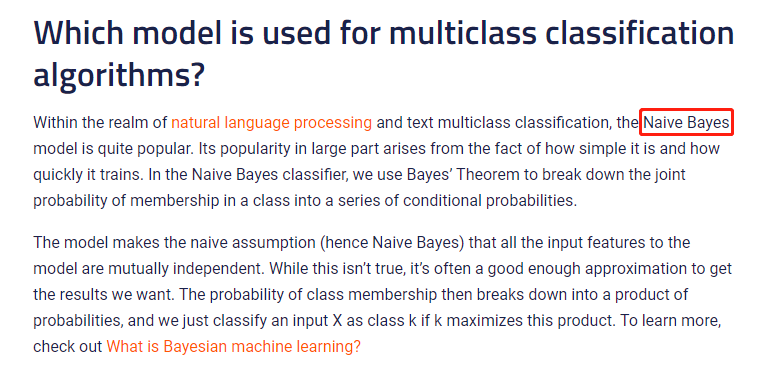

In [9]:
# Build a custom transformer which will extract the starting verb of a sentence
class toarray(BaseEstimator, TransformerMixin):

    # Given it is a tranformer we can return the self 
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return pd.DataFrame(X.toarray())

In [10]:
pipeline = Pipeline([('vectorizer',CountVectorizer(tokenizer=tokenize)),
                     ('tfidf',TfidfTransformer()),
                     ('toa',toarray()),
                     ('gnb',MultiOutputClassifier(GaussianNB()))])

### 4. Train pipeline
- Split data into train and test sets
- Train pipeline

In [11]:
# split to train test data
feature_train, feature_test, label_train, label_test = train_test_split(feature,
                                                                        label,
                                                                        test_size=0.4,
                                                                        random_state=42)

print('len of feature train:',len(feature_train))

start = time.time()
# train the pipeline
pipeline.fit(feature_train,label_train)

print(f'time per train:{(time.time() - start)/3:.3f} second')

len of feature train: 15729
time per train:101.207 second


### 5. Test your model
Report the f1 score, precision and recall for each output category of the dataset. You can do this by iterating through the columns and calling sklearn's `classification_report` on each.

In [12]:
# print out prediction using feature_test
print('Prediction of label:')
label_pred = pipeline.predict(feature_test)
print(label_pred)

# print out accuary
print('Accuary/score',accuracy_score(label_pred,label_test))
print('Accuary/score',pipeline.score(feature_test,label_test))

# Print classification report on test data
print(classification_report(label_test.values,
                            label_pred,
                            target_names=label.columns.values))

Prediction of label:
[[0 1 1 ... 0 1 1]
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 1 0 ... 1 1 1]
 [0 1 0 ... 1 1 1]
 [0 1 0 ... 0 0 1]]
Accuary/score 0.07075426718794699
Accuary/score 0.07075426718794699
                        precision    recall  f1-score   support

               related       0.84      0.64      0.73      8023
               request       0.34      0.67      0.45      1802
                 offer       0.02      0.04      0.03        50
           aid_related       0.45      0.78      0.57      4320
          medical_help       0.10      0.38      0.15       834
      medical_products       0.07      0.29      0.11       542
     search_and_rescue       0.03      0.15      0.05       271
              security       0.01      0.07      0.02       196
              military       0.04      0.16      0.06       323
           child_alone       0.00      0.00      0.00         0
                 water       0.09      0.39      0.15       675
                  food

c:\users\86130\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\86130\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\86130\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, 

### 6. Improve your model
Use grid search to find best parameters and best model
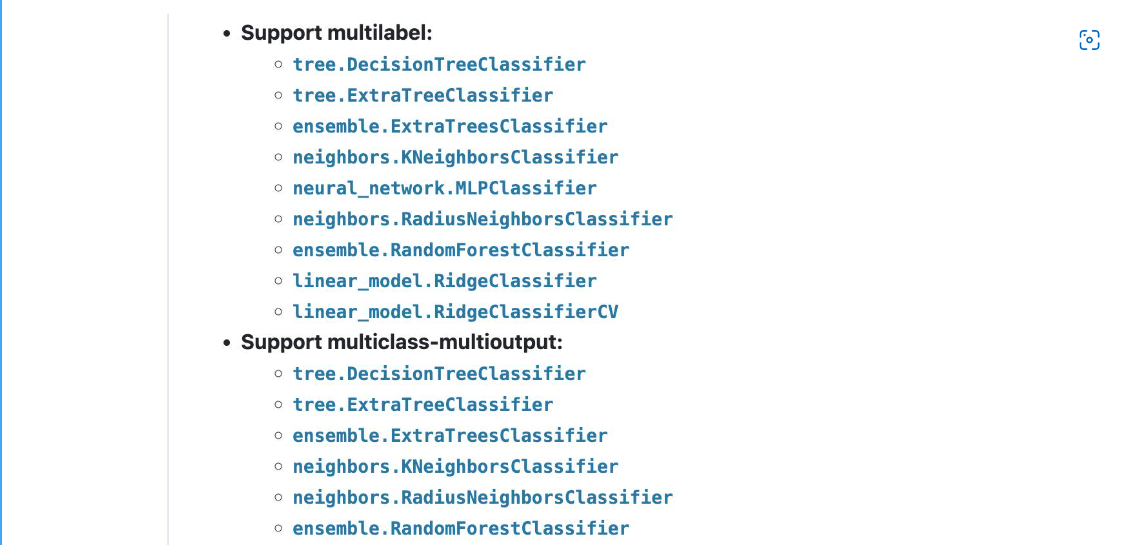

In [13]:
# Initialze the estimators and pipeline
pipeline1 = Pipeline([('vectorizer',CountVectorizer(tokenizer=tokenize)),
                     ('tfidf',TfidfTransformer()),
                     ('toa',toarray()),
                     ('classifier',MultiOutputClassifier(GaussianNB()))])

pipeline2 = Pipeline([('vectorizer',CountVectorizer(tokenizer=tokenize)),
                     ('tfidf',TfidfTransformer()),
                     ('classifier',MultiOutputClassifier(AdaBoostClassifier()))])

pipeline3 = Pipeline([('vectorizer',CountVectorizer(tokenizer=tokenize)),
                     ('tfidf',TfidfTransformer()),
                     ('classifier',MultiOutputClassifier(RandomForestClassifier()))])

pipeline4 = Pipeline([('vectorizer',CountVectorizer(tokenizer=tokenize)),
                     ('tfidf',TfidfTransformer()),
                     ('classifier',MultiOutputClassifier(DecisionTreeClassifier()))])

pipeline5 = Pipeline([('vectorizer',CountVectorizer(tokenizer=tokenize)),
                     ('tfidf',TfidfTransformer()),
                     ('classifier',MultiOutputClassifier(KNeighborsClassifier()))])


In [14]:
# Initiaze the hyperparameters for each dictionary
param1 = {}
param1['classifier__estimator__var_smoothing'] = np.logspace(0,-9, num=5)

param2 = {}
param2['classifier__estimator__learning_rate'] = [0.01, 0.02, 0.05]
param2['classifier__estimator__n_estimators'] = [10, 20, 40]

param3 = {}
param3['classifier__estimator__min_samples_split'] = [1, 2, 3]
param3['classifier__estimator__n_estimators'] = [50, 70, 100]

param4 = {}
param4['classifier__estimator__max_depth'] = [5,10,25,None]
param4['classifier__estimator__min_samples_split'] = [2,5,10]
param4['classifier__estimator__class_weight'] = [None, {0:1,1:5}, {0:1,1:10}, {0:1,1:25}]

param5 = {}
param5['classifier__estimator__n_neighbors'] = [2,5,10,25,50]

In [15]:
param1

{'classifier__estimator__var_smoothing': array([1.00000000e+00, 5.62341325e-03, 3.16227766e-05, 1.77827941e-07,
        1.00000000e-09])}

In [16]:
# the best model we decided depended on the highest F1-Score
start = time.time()

models = [pipeline1,pipeline2,pipeline3,pipeline4,pipeline5]
params = [param1,param2,param3,param4,param5]

score = 0
train = 1
for pipeline,param in zip(models,params):
    cv = GridSearchCV(pipeline,param,cv = 5,n_jobs = -1).fit(feature_train,label_train)
    print('train {} finish'.format(train))
    
    pred = cv.predict(feature_test)
    precision,recall,fscore,support = precision_recall_fscore_support(label_test,
                                                                      pred,
                                                                      average = 'weighted')
    print('train{}: precision:{},recall{},f1:{}'.format(train,precision,recall,fscore))
    
    train += 1
    
    if fscore > score:
        score = fscore
        bmodel = cv

print(f'time per train:{(time.time() - start)/3:.3f} second')

c:\users\86130\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
21 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\users\86130\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\86130\appdata\local\programs\python\python38\lib\site-packages\sklearn\pipeline.py", line 382, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "c:\users\86130\appdata\local\programs\python\python38\lib\site-pa

train 1 finish


c:\users\86130\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\86130\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


train2: precision:0.4915501869505692,recall0.7274008757722992,f1:0.5201683276118466
train 2 finish


c:\users\86130\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\86130\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


train3: precision:0.7597572400844141,recall0.39937616219782857,f1:0.43027951502006734


c:\users\86130\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
15 fits failed out of a total of 45.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "c:\users\86130\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\86130\appdata\local\programs\python\python38\lib\site-packages\sklearn\pipeline.py", line 382, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "c:\users\86130\appdata\local\programs\python\python38\lib\site-p

train 3 finish


c:\users\86130\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\86130\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


train4: precision:0.7728699792052827,recall0.47861555995441185,f1:0.522943968168068
train 4 finish


c:\users\86130\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\86130\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


train5: precision:0.7242009019613865,recall0.5255533561274068,f1:0.5814732348437543
train 5 finish
train6: precision:0.6846977826427391,recall0.2617719392957831,f1:0.2660434143587715
time per train:4897.651 second


c:\users\86130\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\86130\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [17]:
# print out the best model
bmodel

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('vectorizer',
                                        CountVectorizer(tokenizer=<function tokenize at 0x0000023469145700>)),
                                       ('tfidf', TfidfTransformer()),
                                       ('classifier',
                                        MultiOutputClassifier(estimator=DecisionTreeClassifier()))]),
             n_jobs=-1,
             param_grid={'classifier__estimator__class_weight': [None,
                                                                 {0: 1, 1: 5},
                                                                 {0: 1, 1: 10},
                                                                 {0: 1, 1: 25}],
                         'classifier__estimator__max_depth': [5, 10, 25, None],
                         'classifier__estimator__min_samples_split': [2, 5,
                                                                      10]})

In [18]:
# ROC-AUC score for the best model
bmodel.best_score_

0.22671611666264072

### 7. Test your model
Show the accuracy, precision, and recall of the tuned model.  

Since this project focuses on code quality, process, and  pipelines, there is no minimum performance metric needed to pass. However, make sure to fine tune your models for accuracy, precision and recall to make your project stand out - especially for your portfolio!

In [19]:
# print out prediction using feature_test
print('Prediction of label:')
label_predCV = bmodel.predict(feature_test)
print(label_predCV)

# print out accuary
print('Accuary/score',accuracy_score(label_predCV,label_test))
print('Accuary/score',bmodel.score(feature_test,label_test))

# Print classification report on test data
print(classification_report(label_test.values,
                            label_predCV,
                            target_names=label.columns.values))

Prediction of label:
[[1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 1 0 0]
 ...
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Accuary/score 0.2240869648135787
Accuary/score 0.2240869648135787
                        precision    recall  f1-score   support

               related       0.81      0.93      0.86      8023
               request       0.74      0.47      0.57      1802
                 offer       0.00      0.00      0.00        50
           aid_related       0.72      0.44      0.54      4320
          medical_help       0.53      0.24      0.33       834
      medical_products       0.66      0.25      0.36       542
     search_and_rescue       0.59      0.23      0.33       271
              security       0.18      0.03      0.04       196
              military       0.49      0.28      0.36       323
           child_alone       0.00      0.00      0.00         0
                 water       0.79      0.58      0.67       675
                  food  

c:\users\86130\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\86130\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\86130\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, 

In [20]:
result = bmodel.cv_results_

df = pd.DataFrame(result)

print(df.shape)
df

(48, 16)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier__estimator__class_weight,param_classifier__estimator__max_depth,param_classifier__estimator__min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,43.099316,2.665080,4.253277,0.166023,None,5,2,"{'classifier__estimator__class_weight': None, ...",0.209154,0.236173,0.223140,0.216783,0.243879,0.225826,0.012648,5
1,46.137754,4.098135,4.482972,0.331807,None,5,5,"{'classifier__estimator__class_weight': None, ...",0.209472,0.236491,0.223458,0.217101,0.243561,0.226017,0.012468,3
2,41.461909,1.216995,4.381969,0.145614,None,5,10,"{'classifier__estimator__class_weight': None, ...",0.209790,0.238716,0.222505,0.218055,0.244515,0.226716,0.012962,1
3,68.433626,1.857122,4.214970,0.136051,None,10,2,"{'classifier__estimator__class_weight': None, ...",0.219962,0.227273,0.221551,0.217737,0.242925,0.225890,0.009084,4
4,67.123034,1.594582,4.463774,0.236338,None,10,5,"{'classifier__estimator__class_weight': None, ...",0.219644,0.226955,0.219644,0.218373,0.247377,0.226398,0.010918,2
5,67.251685,3.350988,4.191575,0.367960,None,10,10,"{'classifier__estimator__class_weight': None, ...",0.218373,0.229180,0.218690,0.216465,0.244833,0.225508,0.010641,6
6,134.221518,4.327486,3.946631,0.206762,None,25,2,"{'classifier__estimator__class_weight': None, ...",0.201208,0.207883,0.199301,0.190083,0.209539,0.201603,0.006937,8
7,136.378325,4.117984,4.357033,0.200271,None,25,5,"{'classifier__estimator__class_weight': None, ...",0.196122,0.211062,0.198029,0.195804,0.209221,0.202048,0.006678,7
8,132.278361,3.515540,4.218072,0.181450,None,25,10,"{'classifier__estimator__class_weight': None, ...",0.198029,0.207247,0.197711,0.187222,0.208267,0.199695,0.007653,9
9,660.032172,4.149639,4.460173,0.113656,None,None,2,"{'classifier__estimator__class_weight': None, ...",0.147489,0.150350,0.138907,0.141132,0.148172,0.145210,0.004399,12


### 8. Try improving your model further. Here are a few ideas:
* try other machine learning algorithms
* add other features besides the TF-IDF

In [21]:
class length(BaseEstimator, TransformerMixin):

    # Given it is a tranformer we can return the self 
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        
        return pd.DataFrame([len(txt) for txt in X])

In [22]:
# create new pipeline with new feature length
pipeline_new = Pipeline([
        ('features', FeatureUnion([

            ('text_pipeline', Pipeline([
                ('vectorizer', CountVectorizer(tokenizer=tokenize)),
                ('toa',toarray()),
                ('tfidf', TfidfTransformer())
            ])),

            ('get_len', length())
        ])),

        ('clf', MultiOutputClassifier(DecisionTreeClassifier()))
    ])

In [23]:
# fit the pipeline
pipeline_new.fit(feature_train,label_train)

Pipeline(steps=[('features',
                 FeatureUnion(transformer_list=[('text_pipeline',
                                                 Pipeline(steps=[('vectorizer',
                                                                  CountVectorizer(tokenizer=<function tokenize at 0x0000023469145700>)),
                                                                 ('toa',
                                                                  toarray()),
                                                                 ('tfidf',
                                                                  TfidfTransformer())])),
                                                ('get_len', length())])),
                ('clf',
                 MultiOutputClassifier(estimator=DecisionTreeClassifier()))])

In [24]:
# print out prediction using feature_test
print('Prediction of label:')
label_predNew = pipeline_new.predict(feature_test)
print(label_predNew)

# print out accuary
print('Accuary/score',accuracy_score(label_predNew,label_test))
print('Accuary/score',pipeline_new.score(feature_test,label_test))

# Print classification report on test data
print(classification_report(label_test.values,
                            label_predNew,
                            target_names=label.columns.values))

Prediction of label:
[[0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 1 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]]
Accuary/score 0.1420806713073329
Accuary/score 0.1420806713073329
                        precision    recall  f1-score   support

               related       0.83      0.84      0.83      8023
               request       0.56      0.56      0.56      1802
                 offer       0.00      0.00      0.00        50
           aid_related       0.62      0.63      0.63      4320
          medical_help       0.33      0.35      0.34       834
      medical_products       0.38      0.35      0.37       542
     search_and_rescue       0.20      0.20      0.20       271
              security       0.10      0.08      0.09       196
              military       0.36      0.38      0.37       323
           child_alone       0.00      0.00      0.00         0
                 water       0.68      0.64      0.66       675
                  food  

c:\users\86130\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\86130\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\86130\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, 

### 9. Export your model as a pickle file

In [25]:
import joblib

In [26]:
# save the mode
joblib.dump(pipeline_new, path + '\ML_Model')

['D:\\金融股票\\Udacity\\Data Science\\3. Data Engineering\\5. Project - Disaster Response Pipeline\\data\\ML_Model']

In [27]:
# load and test this saved model
model = joblib.load(path + '\ML_Model')

model

Pipeline(steps=[('features',
                 FeatureUnion(transformer_list=[('text_pipeline',
                                                 Pipeline(steps=[('vectorizer',
                                                                  CountVectorizer(tokenizer=<function tokenize at 0x0000023469145700>)),
                                                                 ('toa',
                                                                  toarray()),
                                                                 ('tfidf',
                                                                  TfidfTransformer())])),
                                                ('get_len', length())])),
                ('clf',
                 MultiOutputClassifier(estimator=DecisionTreeClassifier()))])

In [28]:
model.predict(feature_test)

array([[0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 1, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]], dtype=int64)

### 10. Use this notebook to complete `train.py`
Use the template file attached in the Resources folder to write a script that runs the steps above to create a database and export a model based on a new dataset specified by the user.

In [32]:
# save the mode
joblib.dump(pipeline_new, path + '\ML_Model2.pkl')

['D:\\金融股票\\Udacity\\Data Science\\3. Data Engineering\\5. Project - Disaster Response Pipeline\\data\\ML_Model2.pkl']